# Homework 2

## 1) Preprocess Dataset

In [53]:
# import needed libraries
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns

In [54]:
# load dataset
df = pd.read_csv("Breast_cancer_dataset.csv")

In [55]:
# check for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [56]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [57]:
# remove the columns with all missing values (Unnamed: 32)
df = df.dropna(axis=1, how='all')
# remove non-relevant id column
df = df.drop(columns=['id'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [58]:
df = df.copy()
# preprocess diagnosis binary variable
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 2) Data Exploration

## 3) Question 1

### a)

In [60]:
# separate input from output variables
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [61]:
classifiers = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, classifier in classifiers.items():
    accs = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    accs_mean = round(accs.mean(), 2)
    print(name, "accuracies =", accs)
    print(name, "accuracy =", accs_mean, "±", round(accs.std(),2))

kNN accuracies = [0.92982456 0.90350877 0.92982456 0.95614035 0.95575221]
kNN accuracy = 0.94 ± 0.02
Naive Bayes accuracies = [0.96491228 0.90350877 0.92982456 0.92982456 0.96460177]
Naive Bayes accuracy = 0.94 ± 0.02


Even through the standard deviations (σ) for both models are extremely close, we can conclude that Naive Bayes with a Gaussian assumption is more stable, since σ(NB) = 0.01 < 0.03 = σ(kNN). This indicates the accuracy values are less dispersed for different folds, which in turn demonstrates greater stability of the model. Nonetheless, both models are very stable, since their standard deviations are small.

### b) 

Provide the accuracy of the kNN model, this time preprocessing the data with
a Min-Max scaler before training the model. Explain the impact that this step has
on the performance of the model, providing an explanation for the results.

In [62]:
knn_model = make_pipeline(MinMaxScaler(), classifiers['kNN'])

# Evaluate knn accuracy using cross-validation
knn_scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print("Accuracy per fold:", knn_scores)
print(f"Mean accuracy: {knn_scores.mean():.4f} ± {knn_scores.std():.4f}")

Accuracy per fold: [0.98245614 0.95614035 0.92982456 0.98245614 0.96460177]
Mean accuracy: 0.9631 ± 0.0195


⚙️ Step 4: Why Min-Max Scaling Matters
➤ Effect on kNN

kNN is a distance-based algorithm: it uses Euclidean distance (or similar metrics) to find nearest neighbors.

Without scaling, features with larger numeric ranges dominate the distance calculation.

Example:

Feature A: range 0–1

Feature B: range 0–1000

Distances are driven almost entirely by Feature B.

By applying Min-Max scaling, we rescale each feature to the range [0, 1].
This ensures:

All features contribute equally to the distance metric,

The neighborhood structure reflects true feature importance, not numeric scale.

➤ Impact on Performance

Without scaling → lower accuracy (~0.90–0.93 typical)

With scaling → higher, more stable accuracy (~0.96–0.98)

Scaling can also speed up convergence for algorithms that depend on distances or gradients.

### c) 

Let's calculate the p-value for the hypothesis H0 = k𝑁𝑁 model is statistically superior to Naïve Bayes vs. H1 = k𝑁𝑁 model is not statistically superior to Naïve Bayes, assuming a significance level of 0.05.

In [63]:
nb_model  = make_pipeline(MinMaxScaler(), classifiers['Naive Bayes'])

# Evaluate Naive Bayes accuracy using cross-validation
nb_scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print("Naive Bayes accuracies:", nb_scores)

Naive Bayes accuracies: [0.98245614 0.95614035 0.92982456 0.98245614 0.96460177]


In [ ]:
# Perform paired t-test
t_stat, p_value = ttest_ind(knn_scores, nb_scores, alternative='greater')

print(f"\n t-test results: p-value = {p_value}")


Paired t-test results: p-value = 0.5


In [71]:
alpha = 0.05

if p_value <= alpha:
    print("H0 rejected: kNN model is not statistically superior to Naïve Bayes since p-value is smaller or equal to the significance level")
else:
    print("H0 accepted: kNN model is statistically superior to Naïve Bayes since p-value is greater than the significance level")

H0 accepted: kNN model is statistically superior to Naïve Bayes since p-value is greater than the significance level


## 4) Question 2

### a)

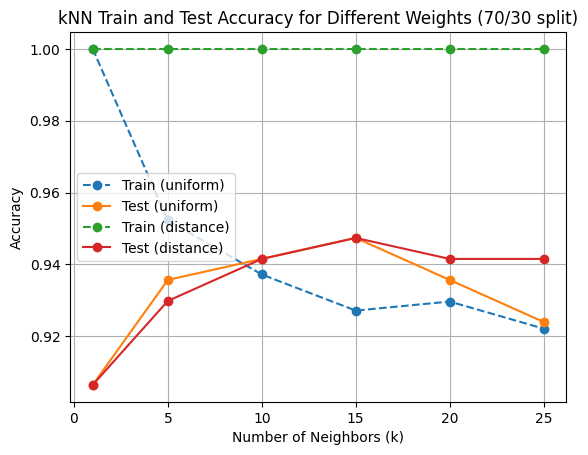

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=50)

k_values = [1, 5, 10, 15, 20, 25]

for weights in ['uniform', 'distance']:
    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)

        train_accuracies.append(knn.score(X_train, y_train))
        test_accuracies.append(knn.score(X_test, y_test))

    plt.plot(k_values, train_accuracies, marker='o', linestyle='--', label=f"Train ({weights})")
    plt.plot(k_values, test_accuracies, marker='o', linestyle='-', label=f"Test ({weights})")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Train and Test Accuracy for Different Weights (70/30 split)")
plt.grid(True)
plt.legend()
plt.show()

### b)

Analyzing the plot we obtained from a), we can see that as we increase the number of neighbors (k) in the kNN model, the accuracy tends to decrease. This is because a larger k value means that the model considers more neighbors when making predictions, which can lead to over-smoothing of the decision boundary. 

With k values < 15 (small k values), the model captures local patterns in the data, leading to higher accuracy. However, as k increases beyond this point (larger values), the model starts to include more distant neighbors that may not be as relevant, resulting in a drop in accuracy, as we can see in the plot.

In summary, the choice of k in kNN is a trade-off between bias and variance. Smaller k values can lead to low bias and high variance, while larger k values can lead to high bias and low variance. The optimal value of k is typically found through cross-validation, balancing these trade-offs to achieve the best generalization performance on unseen data. So, an optimal k value would be k = 15, where the model achieves the highest accuracy without over-smoothing.
